# MIMIC Normal Cohort Exploration Notebook

This notebook provides comprehensive tools to explore the outputs of the normal cohort identification pipeline (Step 1).

## Contents
1. Load and Overview Data
2. Cohort Statistics
3. Demographic Analysis
4. Temporal Analysis
5. Clinical Characteristics
6. Edge Cases Review
7. Data Quality Checks
8. Export & Visualization

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load and Overview Data

In [2]:
# Define paths
OUTPUT_DIR = Path("output/output_test")
COHORTS_DIR = OUTPUT_DIR / "cohorts"
REPORTS_DIR = OUTPUT_DIR / "reports"
REVIEW_DIR = OUTPUT_DIR / "manual_review"

# Load main cohorts
print("Loading cohort data...")
cohort_full = pd.read_csv(COHORTS_DIR / "normal_cohort_full.csv")
cohort_train = pd.read_csv(COHORTS_DIR / "normal_cohort_train.csv")
cohort_val = pd.read_csv(COHORTS_DIR / "normal_cohort_validation.csv")

print(f"Full cohort: {len(cohort_full):,} cases")
print(f"Training set: {len(cohort_train):,} cases")
print(f"Validation set: {len(cohort_val):,} cases")
print(f"\nColumns ({len(cohort_full.columns)}): {list(cohort_full.columns)}")

Loading cohort data...
Full cohort: 23,046 cases
Training set: 19,590 cases
Validation set: 3,456 cases

Columns (28): ['subject_id', 'study_id', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices', 'study_datetime', 'num_images', 'ViewPosition', 'stay_id', 'hadm_id', 'ed_intime', 'ed_outtime', 'ed_disposition', 'time_to_cxr_hours', 'gender', 'anchor_age', 'anchor_year']


In [3]:
# Display first few rows
print("First 5 rows of the cohort:")
cohort_full.head()

First 5 rows of the cohort:


,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,...,ViewPosition,stay_id,hadm_id,ed_intime,ed_outtime,ed_disposition,time_to_cxr_hours,gender,anchor_age,anchor_year
0,10000032,53911762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AP,32952584,29079034.0,2180-07-22 16:24:00,2180-07-23 05:54:00,HOME,15.699132,F,52,2180
1,10000980,54577367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"LATERAL, AP",30449161,NaN,2191-06-13 07:33:00,2191-06-13 13:51:00,HOME,1.215065,F,73,2186
2,10001038,58224503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"PA, LATERAL",34301067,NaN,2149-08-07 08:51:00,2149-08-07 11:02:00,HOME,0.268919,M,20,2149
3,10001122,53957785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"AP, LATERAL",33218129,NaN,2142-04-08 08:40:00,2142-04-08 14:27:00,HOME,1.652292,F,70,2142
4,10001851,59664767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"LATERAL, PA",32304855,NaN,2125-03-14 16:33:00,2125-03-14 20:57:00,HOME,3.372374,F,81,2125


In [4]:
# Load summary statistics
with open(REPORTS_DIR / "summary_statistics.json", 'r') as f:
    summary_stats = json.load(f)

print("Summary Statistics:")
print(f"Total cases: {summary_stats['total_cases']:,}")
print(f"Unique subjects: {summary_stats['unique_subjects']:,}")
print(f"Unique studies: {summary_stats['unique_studies']:,}")

Summary Statistics:
Total cases: 23,046
Unique subjects: 18,559
Unique studies: 23,046


In [5]:
# Load data dictionary
data_dict = pd.read_csv(REPORTS_DIR / "data_dictionary.csv")
print("\nData Dictionary:")
data_dict


Data Dictionary:


,Column,Type,Non-Null Count,Null Count,Null %,Unique Values,Sample Values
0,subject_id,int64,23046,0,0.00%,18559,"10000032, 10000980, 10001038"
1,study_id,int64,23046,0,0.00%,23046,"53911762, 54577367, 58224503"
2,Atelectasis,float64,25,23021,99.89%,1,0.0
3,Cardiomegaly,float64,331,22715,98.56%,1,0.0
4,Consolidation,float64,288,22758,98.75%,1,0.0
5,Edema,float64,336,22710,98.54%,1,0.0
6,Enlarged Cardiomediastinum,float64,197,22849,99.15%,1,0.0
7,Fracture,float64,246,22800,98.93%,1,0.0
8,Lung Lesion,float64,22,23024,99.90%,1,0.0
9,Lung Opacity,float64,59,22987,99.74%,1,0.0


## 2. Cohort Statistics

In [6]:
# Basic statistics
print("=" * 60)
print("COHORT STATISTICS")
print("=" * 60)

print(f"\nTotal cases: {len(cohort_full):,}")
print(f"Unique patients: {cohort_full['subject_id'].nunique():,}")
print(f"Unique studies: {cohort_full['study_id'].nunique():,}")
print(f"Unique ED stays: {cohort_full['stay_id'].nunique():,}")

# Studies per patient
studies_per_patient = cohort_full.groupby('subject_id')['study_id'].nunique()
print(f"\nStudies per patient:")
print(f"  Mean: {studies_per_patient.mean():.2f}")
print(f"  Median: {studies_per_patient.median():.0f}")
print(f"  Max: {studies_per_patient.max()}")

# Display distribution
print(f"\nDistribution of studies per patient:")
print(studies_per_patient.value_counts().sort_index().head(10))

COHORT STATISTICS

Total cases: 23,046
Unique patients: 18,559
Unique studies: 23,046
Unique ED stays: 22,974

Studies per patient:
  Mean: 1.24
  Median: 1
  Max: 36

Distribution of studies per patient:
study_id
1     15900
2      1808
3       481
4       172
5        93
6        37
7        22
8        12
9        10
10        6
Name: count, dtype: int64


## 3. Demographic Analysis

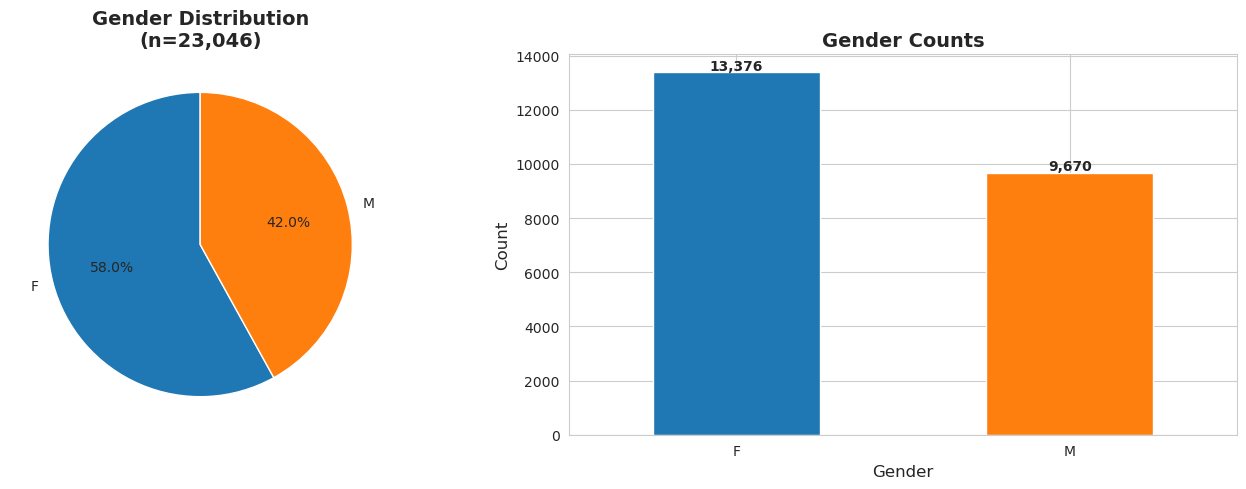

Gender Distribution:
gender
F    13376
M     9670
Name: count, dtype: int64

Percentages:
gender
F    58.040441
M    41.959559
Name: count, dtype: float64


In [7]:
# Gender distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gender pie chart
gender_counts = cohort_full['gender'].value_counts()
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title(f'Gender Distribution\n(n={len(cohort_full):,})', fontsize=14, fontweight='bold')

# Gender bar chart
gender_counts.plot(kind='bar', ax=axes[1], color=['#1f77b4', '#ff7f0e'])
axes[1].set_title('Gender Counts', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].tick_params(axis='x', rotation=0)

# Add count labels on bars
for i, v in enumerate(gender_counts):
    axes[1].text(i, v + 100, f'{v:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("Gender Distribution:")
print(gender_counts)
print(f"\nPercentages:")
print(gender_counts / len(cohort_full) * 100)

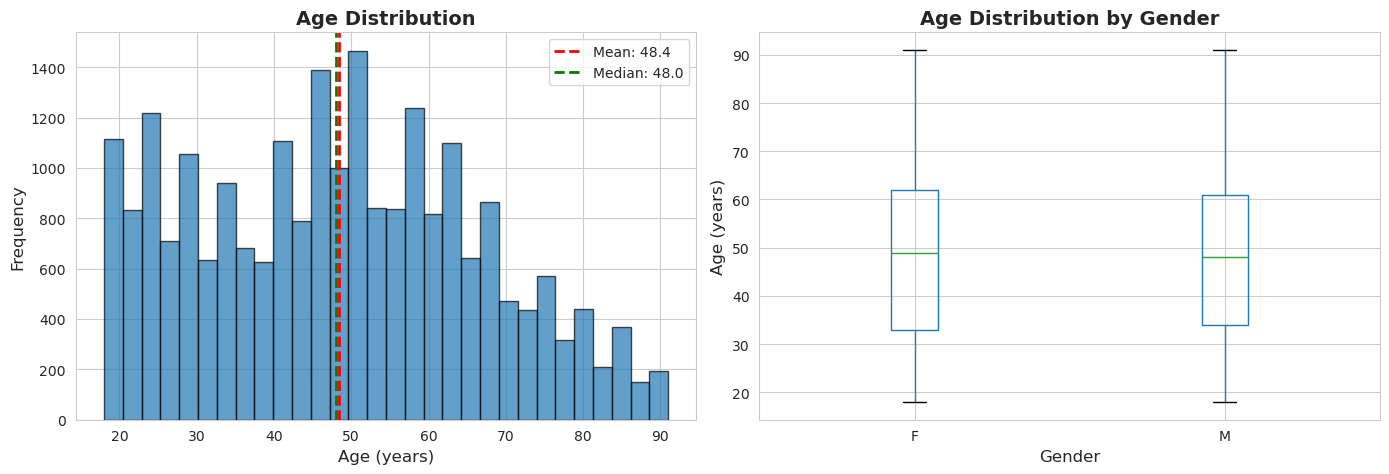

Age Statistics:
count    23046.000000
mean        48.368090
std         18.167126
min         18.000000
25%         33.000000
50%         48.000000
75%         62.000000
max         91.000000
Name: anchor_age, dtype: float64

Age by Gender:
          count       mean        std   min   25%   50%   75%   max
gender                                                             
F       13376.0  48.654231  18.647053  18.0  33.0  49.0  62.0  91.0
M        9670.0  47.972285  17.474798  18.0  34.0  48.0  61.0  91.0


In [8]:
# Age distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age histogram
axes[0].hist(cohort_full['anchor_age'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age (years)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].axvline(cohort_full['anchor_age'].mean(), color='r', linestyle='--', linewidth=2, label=f'Mean: {cohort_full["anchor_age"].mean():.1f}')
axes[0].axvline(cohort_full['anchor_age'].median(), color='g', linestyle='--', linewidth=2, label=f'Median: {cohort_full["anchor_age"].median():.1f}')
axes[0].legend()

# Age boxplot by gender
cohort_full.boxplot(column='anchor_age', by='gender', ax=axes[1])
axes[1].set_title('Age Distribution by Gender', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_ylabel('Age (years)', fontsize=12)
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

print("Age Statistics:")
print(cohort_full['anchor_age'].describe())
print(f"\nAge by Gender:")
print(cohort_full.groupby('gender')['anchor_age'].describe())

## 4. Temporal Analysis

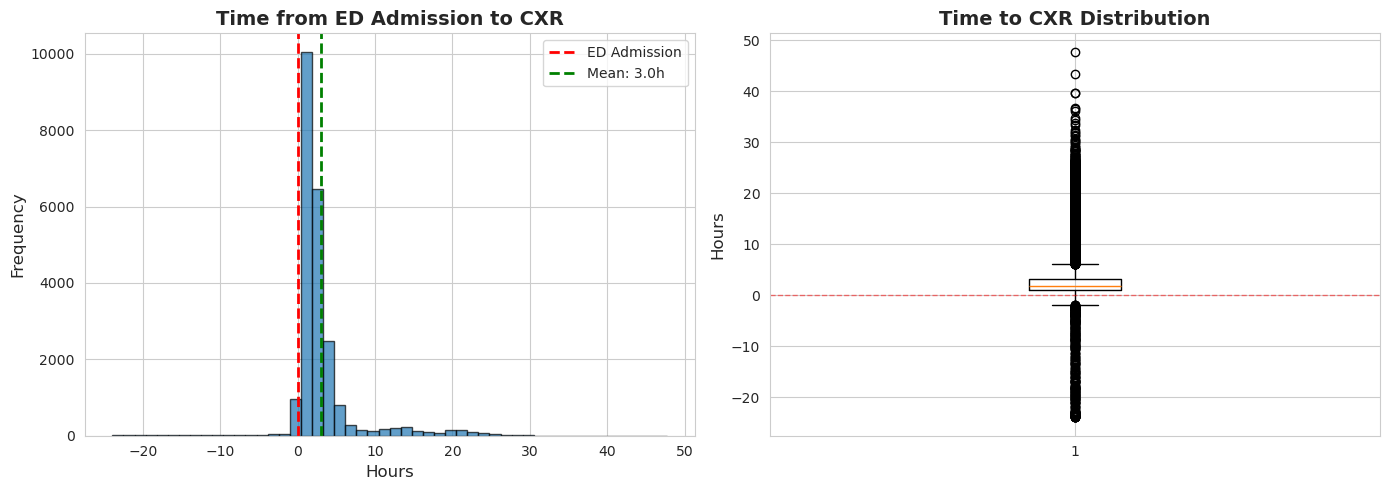

Time to CXR Statistics (hours):
count    23046.000000
mean         2.977971
std          4.527523
min        -23.953953
25%          1.109815
50%          1.891239
75%          3.120720
max         68.450820
Name: time_to_cxr_hours, dtype: float64

Cases with CXR before ED admission (negative time): 340
Cases with CXR > 24h after ED admission: 134


In [9]:
# Time to CXR from ED admission
if 'time_to_cxr_hours' in cohort_full.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Filter reasonable values for visualization
    time_data = cohort_full['time_to_cxr_hours'].dropna()
    time_data_filtered = time_data[time_data.between(-24, 48)]  # Focus on -24 to 48 hours
    
    # Histogram
    axes[0].hist(time_data_filtered, bins=50, edgecolor='black', alpha=0.7)
    axes[0].set_title('Time from ED Admission to CXR', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Hours', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].axvline(0, color='r', linestyle='--', linewidth=2, label='ED Admission')
    axes[0].axvline(time_data.mean(), color='g', linestyle='--', linewidth=2, label=f'Mean: {time_data.mean():.1f}h')
    axes[0].legend()
    
    # Boxplot
    axes[1].boxplot(time_data_filtered)
    axes[1].set_title('Time to CXR Distribution', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Hours', fontsize=12)
    axes[1].axhline(0, color='r', linestyle='--', linewidth=1, alpha=0.5)
    
    plt.tight_layout()
    plt.show()
    
    print("Time to CXR Statistics (hours):")
    print(time_data.describe())
    print(f"\nCases with CXR before ED admission (negative time): {(time_data < 0).sum():,}")
    print(f"Cases with CXR > 24h after ED admission: {(time_data > 24).sum():,}")

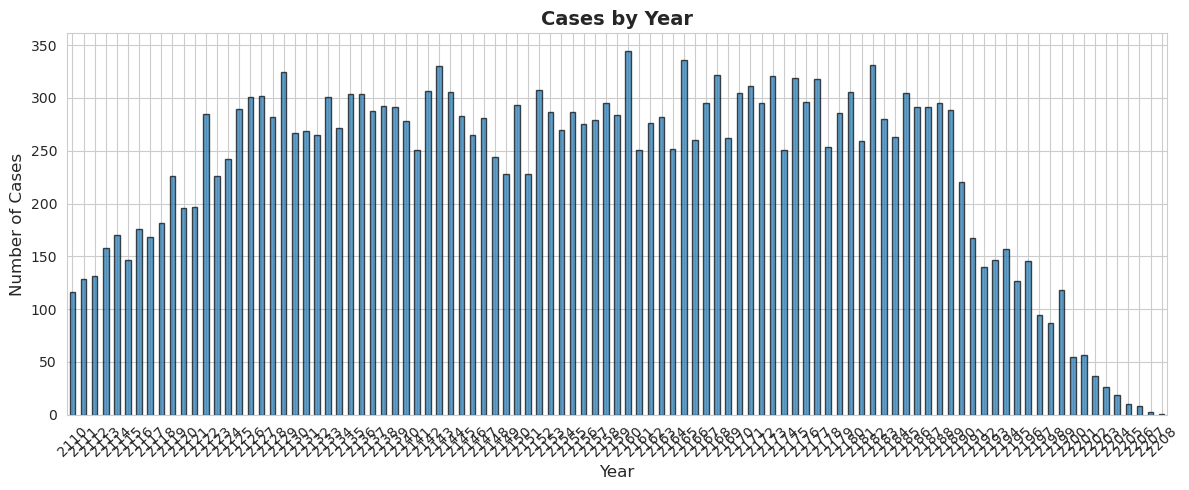

Cases by Year:
anchor_year
2110    116
2111    129
2112    131
2113    158
2114    170
       ... 
2204     19
2205     10
2206      8
2207      3
2208      1
Name: count, Length: 99, dtype: int64


In [10]:
# Study year distribution
if 'anchor_year' in cohort_full.columns:
    year_counts = cohort_full['anchor_year'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 5))
    year_counts.plot(kind='bar', edgecolor='black', alpha=0.7)
    plt.title('Cases by Year', fontsize=14, fontweight='bold')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Cases', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("Cases by Year:")
    print(year_counts)

## 5. Clinical Characteristics

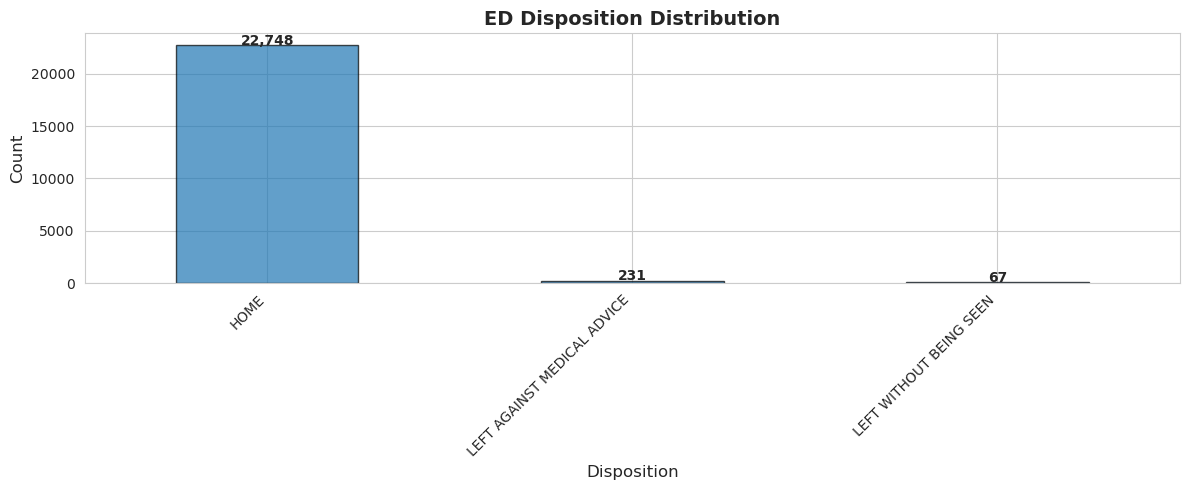

ED Disposition:
ed_disposition
HOME                           22748
LEFT AGAINST MEDICAL ADVICE      231
LEFT WITHOUT BEING SEEN           67
Name: count, dtype: int64

Percentages:
ed_disposition
HOME                           98.706934
LEFT AGAINST MEDICAL ADVICE     1.002343
LEFT WITHOUT BEING SEEN         0.290723
Name: count, dtype: float64


In [11]:
# ED Disposition distribution
if 'ed_disposition' in cohort_full.columns:
    disp_counts = cohort_full['ed_disposition'].value_counts()
    
    plt.figure(figsize=(12, 5))
    disp_counts.plot(kind='bar', edgecolor='black', alpha=0.7)
    plt.title('ED Disposition Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Disposition', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Add count labels
    for i, v in enumerate(disp_counts):
        plt.text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("ED Disposition:")
    print(disp_counts)
    print(f"\nPercentages:")
    print(disp_counts / len(cohort_full) * 100)

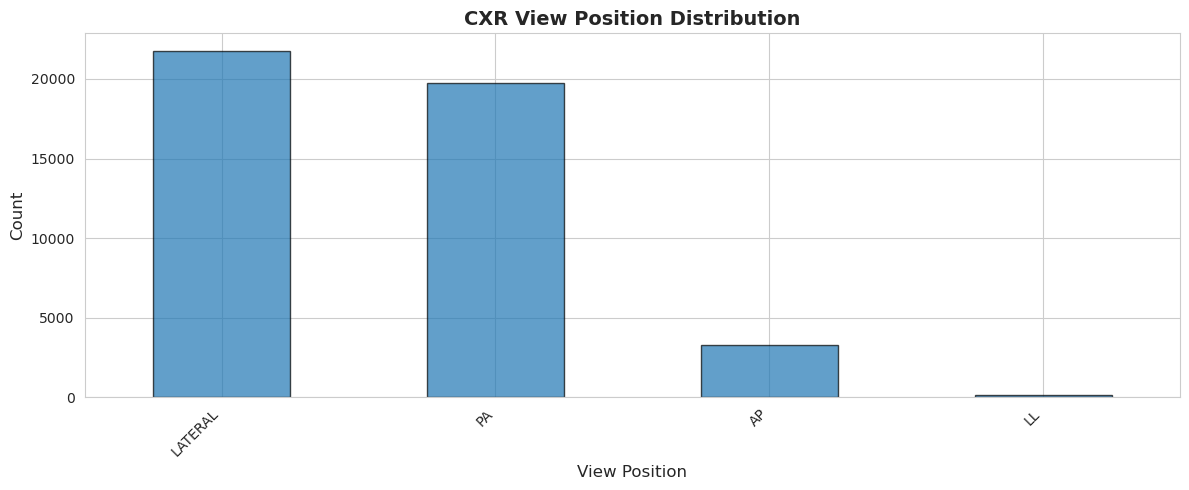

View Positions:
LATERAL    21780
PA         19742
AP          3254
LL           124
Name: count, dtype: int64


In [12]:
# View Position distribution
if 'ViewPosition' in cohort_full.columns:
    # Parse view positions (they might be comma-separated)
    all_views = []
    for views in cohort_full['ViewPosition'].dropna():
        all_views.extend([v.strip() for v in str(views).split(',')])
    
    view_series = pd.Series(all_views)
    view_counts = view_series.value_counts()
    
    plt.figure(figsize=(12, 5))
    view_counts.head(10).plot(kind='bar', edgecolor='black', alpha=0.7)
    plt.title('CXR View Position Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('View Position', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print("View Positions:")
    print(view_counts)

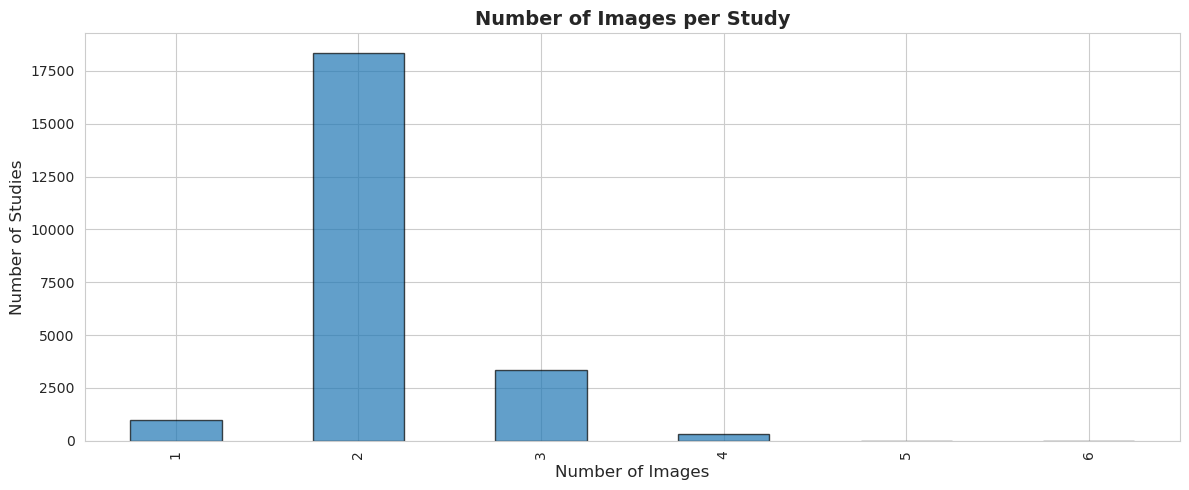

Images per Study:
num_images
1     1001
2    18354
3     3358
4      321
5        9
6        3
Name: count, dtype: int64


In [13]:
# Number of images per study
if 'num_images' in cohort_full.columns:
    img_counts = cohort_full['num_images'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 5))
    img_counts.plot(kind='bar', edgecolor='black', alpha=0.7)
    plt.title('Number of Images per Study', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Images', fontsize=12)
    plt.ylabel('Number of Studies', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    print("Images per Study:")
    print(img_counts)

## 6. Edge Cases Review

Found 4 edge case files:

  very_old: 462 cases
  very_young: 2,734 cases
  long_wait_to_cxr: 134 cases
  uncertain_labels: 2 cases


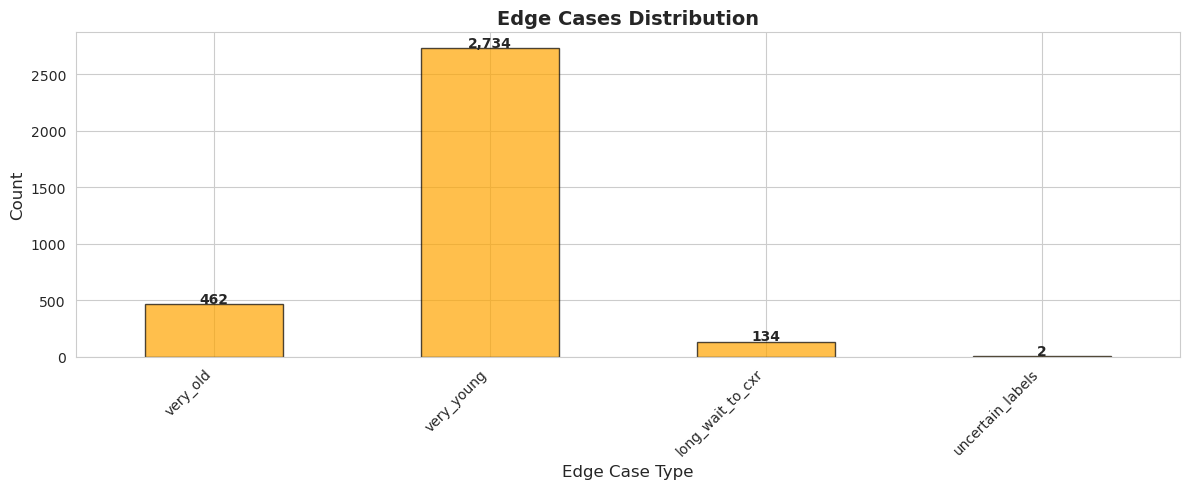

In [14]:
# Load edge cases
edge_case_files = list(REVIEW_DIR.glob("edge_cases_*.csv"))

print(f"Found {len(edge_case_files)} edge case files:\n")

edge_cases = {}
for file_path in edge_case_files:
    case_type = file_path.stem.replace('edge_cases_', '')
    df = pd.read_csv(file_path)
    edge_cases[case_type] = df
    print(f"  {case_type}: {len(df):,} cases")

# Visualize edge case counts
if edge_cases:
    edge_counts = pd.Series({k: len(v) for k, v in edge_cases.items()})
    
    plt.figure(figsize=(12, 5))
    edge_counts.plot(kind='bar', edgecolor='black', alpha=0.7, color='orange')
    plt.title('Edge Cases Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Edge Case Type', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Add count labels
    for i, v in enumerate(edge_counts):
        plt.text(i, v + 10, f'{v:,}', ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

In [15]:
# Examine specific edge cases
for case_type, df in edge_cases.items():
    print(f"\n{'='*60}")
    print(f"Edge Case: {case_type.replace('_', ' ').title()}")
    print(f"{'='*60}")
    print(f"Count: {len(df):,}")
    print(f"\nFirst few examples:")
    display(df.head())
    
    if len(df) > 0:
        print(f"\nSummary statistics:")
        display(df.describe())


Edge Case: Very Old
Count: 462

First few examples:


,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,...,ViewPosition,stay_id,hadm_id,ed_intime,ed_outtime,ed_disposition,time_to_cxr_hours,gender,anchor_age,anchor_year
0,10021395,55834687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AP,38800142,23407350.0,2128-11-26 19:09:00,2128-11-27 11:16:00,HOME,3.252461,F,86,2128
1,10106165,59938773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AP,30643624,NaN,2185-08-21 09:46:00,2185-08-21 16:15:00,HOME,1.942661,F,87,2185
2,10165902,59415624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"LATERAL, PA",39299543,NaN,2152-09-18 13:08:00,2152-09-18 21:58:00,HOME,1.997708,F,91,2152
3,10171148,53477563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"PA, LATERAL",30066294,26569310.0,2140-10-30 23:01:00,2140-10-31 08:15:00,HOME,5.639041,M,91,2139
4,10204466,59488309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"LATERAL, PA",38376670,22459875.0,2147-05-07 11:40:00,2147-05-08 16:03:00,HOME,2.855377,F,86,2145



Summary statistics:


,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,...,Pleural Other,Pneumonia,Pneumothorax,Support Devices,num_images,stay_id,hadm_id,time_to_cxr_hours,anchor_age,anchor_year
count,4.620000e+02,4.620000e+02,0.0,5.0,4.0,8.0,0.0,3.0,0.0,1.0,...,0.0,33.0,2.0,1.0,462.000000,4.620000e+02,1.690000e+02,462.000000,462.000000,462.000000
mean,1.552011e+07,5.504247e+07,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,...,NaN,0.0,0.0,0.0,2.097403,3.478371e+07,2.454200e+07,2.526680,88.430736,2157.785714
std,2.722996e+06,2.845759e+06,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,...,NaN,0.0,0.0,NaN,0.528200,2.909933e+06,2.694788e+06,3.375217,2.079381,24.524890
min,1.002140e+07,5.005603e+07,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,...,NaN,0.0,0.0,0.0,1.000000,3.000820e+07,2.001470e+07,-23.033888,86.000000,2110.000000
25%,1.335146e+07,5.253344e+07,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,...,NaN,0.0,0.0,0.0,2.000000,3.230582e+07,2.212568e+07,1.108822,86.000000,2138.000000
50%,1.573430e+07,5.513863e+07,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,...,NaN,0.0,0.0,0.0,2.000000,3.473368e+07,2.458480e+07,1.758663,88.000000,2156.000000
75%,1.790187e+07,5.723985e+07,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,...,NaN,0.0,0.0,0.0,2.000000,3.720581e+07,2.681311e+07,2.955029,91.000000,2177.750000
max,1.997723e+07,5.996886e+07,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,...,NaN,0.0,0.0,0.0,4.000000,3.999302e+07,2.980874e+07,22.018103,91.000000,2203.000000



Edge Case: Very Young
Count: 2,734

First few examples:


,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,...,ViewPosition,stay_id,hadm_id,ed_intime,ed_outtime,ed_disposition,time_to_cxr_hours,gender,anchor_age,anchor_year
0,10001038,58224503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"PA, LATERAL",34301067,NaN,2149-08-07 08:51:00,2149-08-07 11:02:00,HOME,0.268919,M,20,2149
1,10002157,56373033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"PA, LATERAL",31887902,NaN,2120-12-20 17:35:00,2120-12-21 00:03:00,HOME,3.485156,M,18,2120
2,10002177,50520012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"PA, LATERAL",37215132,NaN,2176-07-19 12:06:00,2176-07-19 15:52:00,HOME,0.526189,F,20,2176
3,10011169,52630873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"PA, LATERAL",39370935,NaN,2174-09-21 18:52:00,2174-09-22 00:44:00,HOME,2.207166,F,20,2171
4,10025458,54445248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"PA, LATERAL",30902743,NaN,2184-06-23 22:47:00,2184-06-24 02:35:00,HOME,10.251532,M,21,2182



Summary statistics:


,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,...,Pleural Other,Pneumonia,Pneumothorax,Support Devices,num_images,stay_id,hadm_id,time_to_cxr_hours,anchor_age,anchor_year
count,2.734000e+03,2.734000e+03,0.0,38.0,23.0,18.0,27.0,37.0,3.0,6.0,...,0.0,133.0,79.0,4.0,2734.000000,2.734000e+03,2.350000e+02,2734.000000,2734.000000,2734.000000
mean,1.503653e+07,5.494757e+07,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,2.091075,3.487920e+07,2.526211e+07,3.325589,21.139722,2150.272129
std,2.860682e+06,2.875613e+06,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.423566,2.873602e+06,2.835537e+06,5.239511,1.875041,23.842187
min,1.000104e+07,5.000376e+07,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,1.000000,3.000069e+07,2.007556e+07,-23.907222,18.000000,2110.000000
25%,1.267277e+07,5.250435e+07,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,2.000000,3.236714e+07,2.288086e+07,1.152638,20.000000,2129.000000
50%,1.503049e+07,5.490572e+07,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,2.000000,3.491766e+07,2.545772e+07,1.979401,21.000000,2150.000000
75%,1.756657e+07,5.746356e+07,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,2.000000,3.729713e+07,2.768897e+07,3.366642,23.000000,2171.000000
max,1.999973e+07,5.999338e+07,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,4.000000,3.999188e+07,2.998996e+07,49.256541,24.000000,2207.000000



Edge Case: Long Wait To Cxr
Count: 134

First few examples:


,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,...,ViewPosition,stay_id,hadm_id,ed_intime,ed_outtime,ed_disposition,time_to_cxr_hours,gender,anchor_age,anchor_year
0,10135015,54912390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"AP, LATERAL",37228419,26641560.0,2190-06-19 11:08:00,2190-06-21 15:29:00,HOME,33.444748,F,63,2190
1,10149624,52065843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"LATERAL, PA",33114190,NaN,2138-07-14 22:01:00,2138-07-15 07:55:00,HOME,24.147795,F,27,2131
2,10161042,51848862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AP,33446323,NaN,2177-08-13 18:12:00,2177-08-13 23:50:00,HOME,24.389349,F,46,2172
3,10166346,50645334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"PA, LATERAL",36060278,NaN,2164-03-21 23:12:00,2164-03-22 12:57:00,HOME,24.501029,F,43,2164
4,10233517,52980269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"LATERAL, PA",35664997,NaN,2159-07-18 19:53:00,2159-07-19 01:55:00,HOME,26.185938,F,21,2159



Summary statistics:


,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,...,Pleural Other,Pneumonia,Pneumothorax,Support Devices,num_images,stay_id,hadm_id,time_to_cxr_hours,anchor_age,anchor_year
count,1.340000e+02,1.340000e+02,1.0,5.0,3.0,8.0,3.0,3.0,1.0,2.0,...,0.0,16.0,6.0,1.0,134.000000,1.340000e+02,4.600000e+01,134.000000,134.000000,134.000000
mean,1.456498e+07,5.496809e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,2.007463,3.508519e+07,2.506628e+07,27.763476,47.291045,2155.656716
std,2.785385e+06,2.988212e+06,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,NaN,0.0,0.0,NaN,0.450501,2.963210e+06,3.062602e+06,5.930228,17.043873,25.165648
min,1.013502e+07,5.002683e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,1.000000,3.002552e+07,2.000888e+07,24.046714,19.000000,2110.000000
25%,1.213143e+07,5.229360e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,2.000000,3.277351e+07,2.220190e+07,24.684639,33.000000,2133.500000
50%,1.458180e+07,5.488597e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,2.000000,3.494610e+07,2.513426e+07,25.700614,48.500000,2158.000000
75%,1.665037e+07,5.774131e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,2.000000,3.795006e+07,2.766713e+07,28.249313,58.000000,2178.750000
max,1.993619e+07,5.983662e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,3.000000,3.998634e+07,2.989679e+07,68.450820,85.000000,2199.000000



Edge Case: Uncertain Labels
Count: 2

First few examples:


,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,...,ViewPosition,stay_id,hadm_id,ed_intime,ed_outtime,ed_disposition,time_to_cxr_hours,gender,anchor_age,anchor_year
0,12525991,50051964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"LATERAL, PA",32335823,NaN,2182-03-24 06:16:00,2182-03-24 14:50:00,HOME,0.475417,M,63,2181
1,19706200,56800344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"AP, LATERAL",38481593,NaN,2142-03-14 18:26:00,2142-03-14 22:36:00,HOME,2.709909,F,33,2135



Summary statistics:


,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,...,Pleural Other,Pneumonia,Pneumothorax,Support Devices,num_images,stay_id,hadm_id,time_to_cxr_hours,anchor_age,anchor_year
count,2.000000e+00,2.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,2.000000,2.000000e+00,0.0,2.000000,2.000000,2.000000
mean,1.611610e+07,5.342615e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.0,2.500000,3.540871e+07,NaN,1.592663,48.000000,2158.000000
std,5.077174e+06,4.771825e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.707107,4.345716e+06,NaN,1.580024,21.213203,32.526912
min,1.252599e+07,5.005196e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.0,2.000000,3.233582e+07,NaN,0.475417,33.000000,2135.000000
25%,1.432104e+07,5.173906e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.0,2.250000,3.387227e+07,NaN,1.034040,40.500000,2146.500000
50%,1.611610e+07,5.342615e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.0,2.500000,3.540871e+07,NaN,1.592663,48.000000,2158.000000
75%,1.791115e+07,5.511325e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.0,2.750000,3.694515e+07,NaN,2.151286,55.500000,2169.500000
max,1.970620e+07,5.680034e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.0,3.000000,3.848159e+07,NaN,2.709909,63.000000,2181.000000


## 7. Data Quality Checks

In [18]:
# Verify 'No Finding' label
if 'No Finding' in cohort_full.columns:
    print("'No Finding' Label Verification")
    print("="*60)
    
    no_finding_values = cohort_full['No Finding'].value_counts(dropna=False)
    print("\nValue distribution:")
    print(no_finding_values)
    
    # Should all be 1.0
    if len(no_finding_values) == 1 and no_finding_values.index[0] == 1.0:
        print("\n✓ All cases have 'No Finding' = 1.0 (as expected)")
    else:
        print("\n⚠ WARNING: Some cases don't have 'No Finding' = 1.0!")

'No Finding' Label Verification

Value distribution:
No Finding
1.0    23046
Name: count, dtype: int64

✓ All cases have 'No Finding' = 1.0 (as expected)


In [19]:
# Check pathology labels (should all be non-positive)
pathology_labels = [
    'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
    'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion',
    'Lung Opacity', 'Pleural Effusion', 'Pleural Other',
    'Pneumonia', 'Pneumothorax', 'Support Devices'
]

available_pathology_labels = [label for label in pathology_labels if label in cohort_full.columns]

if available_pathology_labels:
    print("Pathology Labels Verification")
    print("="*60)
    print("\nChecking for positive pathology findings...\n")
    
    issues = []
    for label in available_pathology_labels:
        positive_count = (cohort_full[label] == 1.0).sum()
        if positive_count > 0:
            issues.append(f"{label}: {positive_count:,} positive cases")
            print(f"⚠ {label}: {positive_count:,} positive cases")
    
    if not issues:
        print("✓ No positive pathology findings (as expected)")
    else:
        print(f"\n⚠ WARNING: Found {len(issues)} pathology labels with positive findings!")

Pathology Labels Verification

Checking for positive pathology findings...

✓ No positive pathology findings (as expected)


## 8. Train/Validation Split Analysis

In [20]:
# Compare train and validation sets
print("Train/Validation Split Comparison")
print("="*60)

print(f"\nSize:")
print(f"  Training: {len(cohort_train):,} ({len(cohort_train)/len(cohort_full)*100:.1f}%)")
print(f"  Validation: {len(cohort_val):,} ({len(cohort_val)/len(cohort_full)*100:.1f}%)")

# Compare demographics
print(f"\nGender Distribution:")
print("\nTraining Set:")
print(cohort_train['gender'].value_counts(normalize=True) * 100)
print("\nValidation Set:")
print(cohort_val['gender'].value_counts(normalize=True) * 100)

print(f"\nAge Statistics:")
print("\nTraining Set:")
print(cohort_train['anchor_age'].describe())
print("\nValidation Set:")
print(cohort_val['anchor_age'].describe())

Train/Validation Split Comparison

Size:
  Training: 19,590 (85.0%)
  Validation: 3,456 (15.0%)

Gender Distribution:

Training Set:
gender
F    57.896886
M    42.103114
Name: proportion, dtype: float64

Validation Set:
gender
F    58.854167
M    41.145833
Name: proportion, dtype: float64

Age Statistics:

Training Set:
count    19590.000000
mean        48.379837
std         18.121524
min         18.000000
25%         33.000000
50%         48.000000
75%         62.000000
max         91.000000
Name: anchor_age, dtype: float64

Validation Set:
count    3456.000000
mean       48.301505
std        18.425992
min        18.000000
25%        32.000000
50%        48.000000
75%        61.000000
max        91.000000
Name: anchor_age, dtype: float64


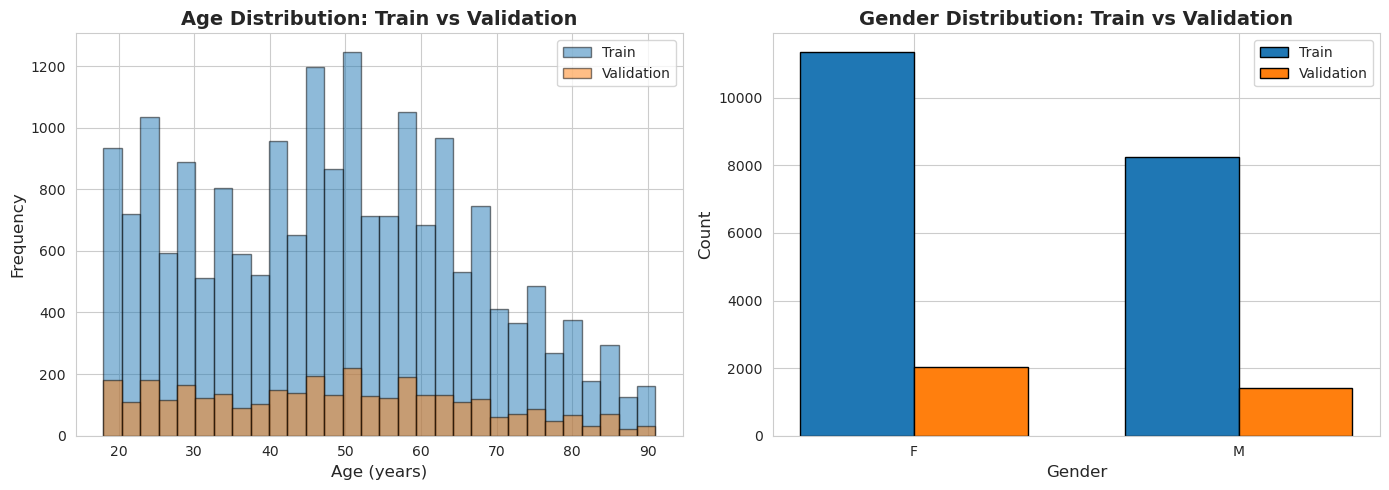

In [21]:
# Visualize train/val comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Age comparison
axes[0].hist(cohort_train['anchor_age'], bins=30, alpha=0.5, label='Train', edgecolor='black')
axes[0].hist(cohort_val['anchor_age'], bins=30, alpha=0.5, label='Validation', edgecolor='black')
axes[0].set_title('Age Distribution: Train vs Validation', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age (years)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()

# Gender comparison
train_gender = cohort_train['gender'].value_counts()
val_gender = cohort_val['gender'].value_counts()

x = np.arange(len(train_gender))
width = 0.35

axes[1].bar(x - width/2, train_gender, width, label='Train', edgecolor='black')
axes[1].bar(x + width/2, val_gender, width, label='Validation', edgecolor='black')
axes[1].set_title('Gender Distribution: Train vs Validation', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xticks(x)
axes[1].set_xticklabels(train_gender.index)
axes[1].legend()

plt.tight_layout()
plt.show()

## 9. Summary Report

In [22]:
# Generate comprehensive summary
print("="*80)
print("COMPREHENSIVE COHORT SUMMARY")
print("="*80)

print(f"\n1. DATASET SIZE")
print(f"   Total cases: {len(cohort_full):,}")
print(f"   Unique patients: {cohort_full['subject_id'].nunique():,}")
print(f"   Unique studies: {cohort_full['study_id'].nunique():,}")
print(f"   Training set: {len(cohort_train):,} ({len(cohort_train)/len(cohort_full)*100:.1f}%)")
print(f"   Validation set: {len(cohort_val):,} ({len(cohort_val)/len(cohort_full)*100:.1f}%)")

print(f"\n2. DEMOGRAPHICS")
print(f"   Gender:")
for gender, count in cohort_full['gender'].value_counts().items():
    print(f"     {gender}: {count:,} ({count/len(cohort_full)*100:.1f}%)")
print(f"   Age: {cohort_full['anchor_age'].mean():.1f} ± {cohort_full['anchor_age'].std():.1f} years")
print(f"   Age range: {cohort_full['anchor_age'].min()}-{cohort_full['anchor_age'].max()} years")

if 'ed_disposition' in cohort_full.columns:
    print(f"\n3. CLINICAL CHARACTERISTICS")
    print(f"   ED Dispositions:")
    for disp, count in cohort_full['ed_disposition'].value_counts().head(5).items():
        print(f"     {disp}: {count:,} ({count/len(cohort_full)*100:.1f}%)")

if 'time_to_cxr_hours' in cohort_full.columns:
    time_data = cohort_full['time_to_cxr_hours'].dropna()
    print(f"\n4. TEMPORAL CHARACTERISTICS")
    print(f"   Mean time to CXR: {time_data.mean():.1f} hours")
    print(f"   Median time to CXR: {time_data.median():.1f} hours")
    print(f"   CXR > 24h after ED: {(time_data > 24).sum():,} ({(time_data > 24).sum()/len(time_data)*100:.1f}%)")

if edge_cases:
    print(f"\n5. EDGE CASES")
    for case_type, df in edge_cases.items():
        print(f"   {case_type.replace('_', ' ').title()}: {len(df):,}")

print(f"\n6. DATA QUALITY")
print(f"   Columns with missing data: {len(missing_df)}")
print(f"   Duplicate studies: {len(dup_studies):,}")
print(f"   All 'No Finding' = 1.0: {(cohort_full['No Finding'] == 1.0).all()}")

print("\n" + "="*80)

COMPREHENSIVE COHORT SUMMARY

1. DATASET SIZE
   Total cases: 23,046
   Unique patients: 18,559
   Unique studies: 23,046
   Training set: 19,590 (85.0%)
   Validation set: 3,456 (15.0%)

2. DEMOGRAPHICS
   Gender:
     F: 13,376 (58.0%)
     M: 9,670 (42.0%)
   Age: 48.4 ± 18.2 years
   Age range: 18-91 years

3. CLINICAL CHARACTERISTICS
   ED Dispositions:
     HOME: 22,748 (98.7%)
     LEFT AGAINST MEDICAL ADVICE: 231 (1.0%)
     LEFT WITHOUT BEING SEEN: 67 (0.3%)

4. TEMPORAL CHARACTERISTICS
   Mean time to CXR: 3.0 hours
   Median time to CXR: 1.9 hours
   CXR > 24h after ED: 134 (0.6%)

5. EDGE CASES
   Very Old: 462
   Very Young: 2,734
   Long Wait To Cxr: 134
   Uncertain Labels: 2

6. DATA QUALITY
   Columns with missing data: 15
   Duplicate studies: 0
   All 'No Finding' = 1.0: True



## 10. Export Functions

In [23]:
# Function to export filtered cohorts
def export_filtered_cohort(cohort_df, filter_condition, filename):
    """
    Export a filtered subset of the cohort.
    
    Args:
        cohort_df: Full cohort DataFrame
        filter_condition: Boolean mask for filtering
        filename: Output filename
    """
    filtered = cohort_df[filter_condition]
    output_path = COHORTS_DIR / filename
    filtered.to_csv(output_path, index=False)
    print(f"Exported {len(filtered):,} cases to {output_path}")
    return filtered

# Example: Export specific age groups
# young_adults = export_filtered_cohort(
#     cohort_full,
#     cohort_full['anchor_age'].between(18, 30),
#     "young_adults_18_30.csv"
# )

print("Export functions ready to use!")

Export functions ready to use!
